# 畳み込みをやってみる

In [5]:
# import chainer
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from common.util import im2col

## 簡単なデータで畳み込みをやってみる

### 入力データをつくる

In [6]:
img = np.array([[[[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]]]])
img

array([[[[1, 2, 3, 0],
         [0, 1, 2, 3],
         [3, 0, 1, 2],
         [2, 3, 0, 1]]]])

### 畳み込み演算用に配列を変形する

In [7]:
col = im2col(img,3,3,stride=1,pad=0)
print(col.shape)
col

(4, 9)


array([[ 1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.,  1.],
       [ 2.,  3.,  0.,  1.,  2.,  3.,  0.,  1.,  2.],
       [ 0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.],
       [ 1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.,  1.]])

### フィルターをつくる

In [8]:
flt = np.array([[2,0,1],[0,1,2],[1,0,2]])
flt

array([[2, 0, 1],
       [0, 1, 2],
       [1, 0, 2]])

### 畳み込み演算用に配列を1次元配列に変形する

In [9]:
flt = flt.reshape(-1)
flt

array([2, 0, 1, 0, 1, 2, 1, 0, 2])

### 畳み込む

In [10]:
img_y =  np.dot(col,flt)
img_y.reshape(2,2)

array([[ 15.,  16.],
       [  6.,  15.]])

## MINIST画像で畳み込みをやってみる

In [ ]:
# Load the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/", one_hot=True) #パスは適宜変更する
train = mnist.train.images
test = mnist.test.images

def show_image(img): 
    pil_img = Image.fromarray(img)
    plt.imshow(pil_img)
    plt.gray()
    plt.show()
    return

### trainの1枚目を取り出す

In [ ]:
label = train[0]
img = train[0]
print("label=%s"%label)
img = img.reshape(28,28)
img = img*255
show_image(img)

### 畳み込み演算用に配列を変換する

In [ ]:
img = img.reshape(1,1,28,28)
col = im2col(img,3,3,stride=1,pad=0)
print(col.shape)
col

### フィルターをつくる

In [ ]:
flt_mean = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])#平均化フィルター
print(flt_mean.sum())
flt_mean

### 畳み込み演算用に配列を変換する

In [ ]:
flt_mean = flt_mean.reshape(-1)
flt_mean

### 畳み込む

In [ ]:
img_y= np.dot(col,flt_mean)
img_y = img_y.reshape(26,26)
img_y

In [ ]:
show_image(img_y)

## いろんなフィルターを試してみる

### 垂直方向の輪郭

In [ ]:
flt_dv = np.array([[0,0,0],[0,1,-1],[0,0,0]])
print(flt_dv.sum())
flt_dv

In [ ]:
flt_dv = flt_dv.reshape(-1)
img_y= np.dot(col,flt_dv)
img_y = img_y.reshape(26,26)
show_image(img_y)

### 水平方向の輪郭

In [ ]:
flt_dh = np.array([[0,0,0],[0,1,0],[0,-1,0]])
print(flt_dh.sum())
flt_dh

In [ ]:
img_y= np.dot(col, flt_dh.reshape(-1))
img_y = img_y.reshape(26,26)
show_image(img_y)

## 他の写真で畳み込みを試してみる

In [ ]:
img_ = Image.open("../1_data/bridge.jpg")
img_

In [ ]:
img_ =  np.asarray(img_)
print("次元:",img_.shape)
img_

In [45]:
img_ = img_.transpose(2,0,1)
print("次元:",img_.shape)
img_

次元: (3, 224, 224)


array([[[ 88,  89,  92, ...,  63,  62,  63],
        [ 92,  92,  91, ...,  63,  63,  64],
        [ 92,  91,  91, ...,  64,  63,  63],
        ..., 
        [ 75,  73,  65, ...,  69,  65,  64],
        [ 62,  64,  67, ...,  63,  64,  61],
        [ 58,  64,  71, ...,  64,  62,  61]],

       [[117, 118, 118, ...,  85,  84,  85],
        [116, 118, 117, ...,  85,  85,  86],
        [116, 117, 117, ...,  86,  85,  84],
        ..., 
        [ 93,  91,  86, ...,  86,  84,  85],
        [ 80,  82,  88, ...,  82,  83,  78],
        [ 78,  84,  92, ...,  81,  79,  78]],

       [[175, 178, 177, ..., 135, 134, 135],
        [176, 177, 178, ..., 135, 135, 136],
        [178, 176, 176, ..., 133, 135, 137],
        ..., 
        [115, 115, 107, ..., 106, 101, 104],
        [104, 106, 109, ...,  97, 100,  96],
        [102, 108, 113, ...,  99,  97,  96]]], dtype=uint8)

### 畳み込み用に配列を変換する

In [46]:
col_ = im2col(img_.reshape(1,3,224,224),3,3,stride=1,pad=0)
print(col_.shape)
col_

(49284, 27)


array([[  88.,   89.,   92., ...,  178.,  176.,  176.],
       [  89.,   92.,   91., ...,  176.,  176.,  177.],
       [  92.,   91.,   90., ...,  176.,  177.,  175.],
       ..., 
       [  71.,   72.,   69., ...,  101.,   95.,   99.],
       [  72.,   69.,   65., ...,   95.,   99.,   97.],
       [  69.,   65.,   64., ...,   99.,   97.,   96.]])

### 畳み込む

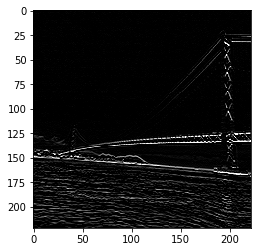

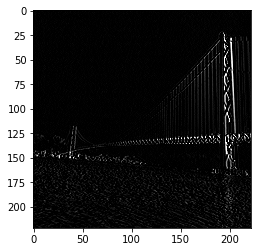

In [47]:
flt_dh_3 = np.array([flt_dh,flt_dh,flt_dh])
img_y= np.dot(col_,flt_dh_3.reshape(-1))
img_y = img_y.reshape(222,222)
show_image(img_y)

flt_dh_3 = np.array([flt_dv,flt_dv,flt_dv])
img_y= np.dot(col_,flt_dh_3.reshape(-1))
img_y = img_y.reshape(222,222)
show_image(img_y)

### [演習]
- 自分が持っている写真で畳み込みを試してみましょう。